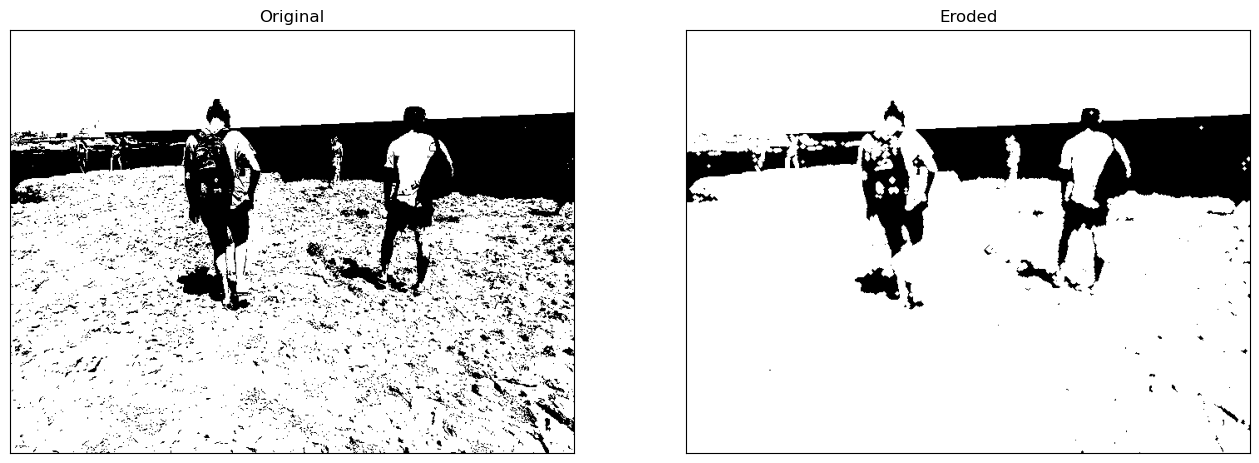

In [11]:
import sys, cv2
import numpy as np
import matplotlib.pyplot as plt

##### Functions #####

def erode(image, se):
    image_h, image_w = image.shape
    output = np.zeros_like(image)  # The output matches the original image size

    se_h, se_w = se.shape
    # Calculate padding size
    pad_h = se_h // 2
    pad_w = se_w // 2  
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='symmetric')
    
    for i in range(image_h):
        for j in range(image_w):
            # Check the overlap region
            overlap = padded_image[i:i+se_h, j:j+se_w] & se
            if np.array_equal(overlap, se):
                output[i, j] = 1 
    return output


def dilate(image, se):
    se_h, se_w = se.shape
    # Calculate padding size
    pad_h = se_h // 2
    pad_w = se_w // 2  
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='symmetric')

    image_h, image_w = image.shape
    output = np.zeros_like(padded_image)  # The output will need to be resized
    
    for i in range(image_h):
        for j in range(image_w):
            if image[i, j] == 1:
                output[i:i+se_h, j:j+se_w] = output[i:i+se_h, j:j+se_w] | se
    return output[pad_h:pad_h+image_h, pad_w:pad_w+image_w]



##### Main program #####

image_name = "images/sea.png"
structuring_element_name = "elements/5x5.png"
operation = "e"
try:
    # Read image
    grayscale = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    image = np.where(grayscale > np.max(grayscale)/2, 0, 1) # Apply threshold

    # Read structuring element
    se = cv2.imread(structuring_element_name, cv2.IMREAD_GRAYSCALE)
    se = np.where(se > 127, 0, 1)

except Exception as e:
    print("Input error: ", e)
    sys.exit()


try:
    # Apply the operations
    if operation == 'e':
        elaborated_image = erode(image, se)
        label = "Eroded"
    elif operation == 'd':
        elaborated_image = dilate(image, se)
        label = "Dilated"
    elif operation == 'c':
        img = dilate(image, se)
        elaborated_image = erode(img, se)
        label = "Closed"
    else:
        img = erode(image, se)
        elaborated_image = dilate(img, se)
        label = "Opened"

except Exception as e:
    print("Error: ", e)
    sys.exit()


try:
    # Display the results
    plt.figure(figsize=(16, 9))
    for i, (image, title) in enumerate(zip([image, elaborated_image], ['Original', label]), 1):
        ax = plt.subplot(1, 2, i)
        plt.imshow(image, cmap='gray_r')
        plt.title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

except Exception as e:
    print("Error: ", e)